# Week 8 Assignment
# Niraj Devkota
# Presidential Business School, Kathmandu
# PRG 330: Python Programming with Data
# Prof. Tek Raj Pant
# December 15, 2024

## ------------------------------------------- ##

## Nepal's Economy-Based Projects
## Tourism Revenue Prediction

## Overview of the Project

#### In this Nepal's economy based project focusing on Tourism Revenue Predcition, I first preprocessed a given dataset of tourism in order to make it prepared for modeling. This involved dealing with missing values, eliminating observations with large values or those repeated more than once. I moreover introduced new variables such as “Earnings per Arrival” as well as normalizing the data so as to eliminate variability between each of the factors. In order to form the data analysis more clear I utilized distinctive kind of visualizations like histogram, heatmap, scatter plot and line graph to discover out correlation between diverse factors.

#### After preprocessing the data I divided it into features and target variable and fitted a few machine learning models. Other than, I attempted linear, Random Forest Regressor, and built polynomial models as I needed to adjust for cases where there were other concealed patterns within the data. In comparing the models I observed that Random Forest Regressor was the most satisfactory in terms of accuracy.

#### Utilizing the Random Forest model I was able to predict the “Total Earnings (NRs. million)” for the year 2023 which gives important data on the prospect of the tourism segment in Nepal. This prediction can be valuable for arranging and making choices and will allow an improved idea of the potential position of the Nepal's economy in the following year. 

# Data Importing

#### To begin with I imported the library known as pandas and utilized it for loading the data into a DataFrame. The dataset specifically which I named "tourism_data_1995_2022__week8.csv" includes data regarding tourism in Nepal from year 1995 till 2022. After loading the dataset I utilized the df.columns to check the structure and factors present within the column of the dataset. Further I utilized df.head() to get a overview of the data by simply showing the first few columns of it to get quick overview of data.

#### These are the variables that I discovered while observing the dataset:
- "Fiscal Year": The year relative to the data
- "Total Earnings (NRs. million)": Net Profit or Earnings in Nepalese Rupees in Million
- "US$ Annual Average Exchange Rate": Average exchange rate for USD
- "US$ Earnings (million)": Net Profit or Earnings in US dollars in Million 
- "% Change in Earnings": Percentage change in tourism earnings compared to previous year
- "Total Arrivals": Total number of tourist arrival in Nepal
- "% Change in Arrivals": Percentage change in tourist arrivals compared to previous year

#### And these are the data source link:
- Nepal Tourism Statistics 2019
    - Link: https://nsonepal.gov.np/content/7464/7464-analytical-report-tourism/
    - Published by: Ministry of Tourism, Nepal

- Analytical Report on Tourism
    - Link: https://www.tourism.gov.np/files/NOTICE%20MANAGER_FILES/Nepal_%20tourism_statics_2019.pdf
    - Published by: Nepal Statistics Office

In [35]:
import pandas as pd

# Load the data
df = pd.read_csv('data/tourism_data_1995_2022__week8.csv')

print(df.columns)
print(df.head())



Index(['Fiscal Year', 'Total Earnings (NRs. million)',
       'US$ Annual Average Exchange Rate', 'US$ Earnings (million)',
       '% Change in Earnings', 'Total Arrivals', '% Change in Arrivals'],
      dtype='object')
   Fiscal Year  Total Earnings (NRs. million)  \
0         1995                         232891   
1         1996                         237911   
2         1997                         201057   
3         1998                         248013   
4         1999                         229793   

   US$ Annual Average Exchange Rate  US$ Earnings (million)  \
0                             49.94                 4644.47   
1                             55.21                 4293.08   
2                             57.02                 3525.96   
3                             61.95                 4002.42   
4                             67.95                 3369.36   

   % Change in Earnings  Total Arrivals  % Change in Arrivals  
0                   NaN          463646   

## Data Cleaning

#### Data cleaning is the method of cleaning the raw data for inconsistencies, error, missing value and any other imperfections which can prevent it from extracting accurate analysis of the data(Hosseinzadeh et al., 2021). This step is exceptionally imperative as clean and complete data implies more accurate results and better performance of the model.

#### For this I started with the process of dealing with missing values within the dataset. With respect to the missing values of the numeric columns, I decided to impute them with the mean of the specific column so as not to present major distortions by filling them up randomly at the same time not losing the structure of the data. I too cleaned the dataset to expel the repeated records to dodge cluttering the list and to preserve the quality of the dataset. To address inconsistencies within the logical flow I excluded the lines that contained negative values within the “Total Arrivals,” “US$ Earnings (million),” and “Total Earnings (NRs. million)” columns as the negative values cannot be expected within the case of tourism data.

#### Since the “Season” column falls beneath categorical data, I applied label encoding and one hot encoding such that, it can fit into the different machine learning models without loss of meaning. I moreover replaced the missing values of the target factors; total earnings (NRs. million), total arrivals with the median so that the outliers don't skew the results. Finally, all additional rows that had missing values remaining were moreover deleted in arrange to have a neat data set.

#### This cleaning was critical in the preparation of the dataset for analysis and modeling. In order to reduce issues with missing data, inconsistencies, and ease of working with the data I was able to develop a strong system for creating concrete and reasonable models for foreseeing trends and gain a much better understanding of the tourism industry.


In [35]:
import pandas as pd
# Handle missing values (fill with mean or median) for numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns  # Select only numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())  # Fill missing values with mean for numeric columns

# Drop duplicates
df.drop_duplicates(inplace=True)

# Check for inconsistencies (negative values where they shouldn't exist)
df = df[df['Total Arrivals'] >= 0]  # Remove negative arrivals
df = df[df['US$ Earnings (million)'] >= 0]  # Remove negative earnings

# Check for negative values in other columns
df = df[df['Total Earnings (NRs. million)'] >= 0]  # Remove negative earnings in NRs.
from sklearn.preprocessing import LabelEncoder

# For columns with categorical data, apply Label Encoding
label_encoder = LabelEncoder()

X['Season'] = label_encoder.fit_transform(X['Season'])
# One-Hot Encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Filling missing values for the features (X) after converting categorical to numeric
X = X.fillna(X.median())  #  mean() or other strategies based on your data
#  target variables are numeric
y_earnings = pd.to_numeric(y_earnings, errors='coerce')
y_arrivals = pd.to_numeric(y_arrivals, errors='coerce')

# Fill missing values for the features (X)
X = X.fillna(X.median())  #use mean() or other strategies based on your data

# Filling missing values for the target variables (y)
y_earnings = y_earnings.fillna(y_earnings.median())
y_arrivals = y_arrivals.fillna(y_arrivals.median())

# Dropping rows with missing values in the features or target variables
df_cleaned = df.dropna()
X_cleaned = df_cleaned.drop(columns=['Total Earnings (NRs. million)', 'Total Arrivals'])
y_earnings_cleaned = df_cleaned['Total Earnings (NRs. million)']
y_arrivals_cleaned = df_cleaned['Total Arrivals']

# Verify the data after cleaning
print(df.isnull().sum())
# Check the shape of the DataFrame to see if any rows were removed
print(df.shape)
print(df.head())


Fiscal Year                         0
Total Earnings (NRs. million)       0
US$ Annual Average Exchange Rate    0
US$ Earnings (million)              0
% Change in Earnings                0
Total Arrivals                      0
% Change in Arrivals                0
Earnings per Arrival                0
Lagged Earnings                     0
Lagged Arrivals                     0
Rolling Average Earnings            0
Exchange Rate Bin                   7
Revenue per Tourist                 0
Season                              1
Earnings % Change                   0
Arrivals % Change                   0
Decade                              0
dtype: int64
(28, 17)
   Fiscal Year  Total Earnings (NRs. million)  \
0         1995                         232891   
1         1996                         237911   
2         1997                         201057   
3         1998                         248013   
4         1999                         229793   

   US$ Annual Average Exchange Rate  

## Data Visualization

#### Data Visualization is the act of visually displaying data in the form of a chart, graph, or plot. It simplifies huge sums of data and can be utilized to detect patterns, trends or additional data that will not be effectively seen from the numbers. Visualization is critical since huge data is rearranged, and it gets to be simple to analyze data and to pick data insights that can support decisions. Positioning the data in a format where I can visualize a few of the relationship between distinctive factors as well as searching for the outliers helped me to induce improved understanding of the data and perhaps, patterns over time.

#### In this case, I utilized four visualizations to analyze and understand the dataset I was working on. In order to observe the dispersion of the values and how it was distinctive from the mean, I built a histogram of Total Earnings (NRs. million). I found that including a smooth KDE line over the histogram made a difference in observing the shape of the distribution of the data – whether the information was spread thin or perhaps skewed in one direction where in my case it was spread in one direction. This approach was valuable to permit me to distinguish essential expressive measures with the data such as range and degree of central tendency.

#### I moreover made another scatter plot of Total Earnings (NRs. million) on the Y axis and Total Arrivals on the X axis to see the relationship between two these two factors. From this plot, I noticed a clear positive relationship, 'Total earnings' too followed a similar pattern, and with an increment within the number of tourists the overall number of arrivals showed a growth. It allowed me to effectively perceive any trends, whereas seeing such boundaries empowered me to effectively rule out any data points which incredibly deviate from this design. All these information I used to improved my common perception of tourists behavior and sources of income revenues.

#### Finally, to visualise all the numeric variables pairwise co-relationship I constructed a heatmap of correlation matrix. The heatmap for the various variables expressed various correlation coefficients, with high correlation coefficients like that between the Total Earnings NRs. and Total Arrivals(0.90), in vibrant red, and low correlation one’s in a cooler blue shade. This heatmap allowed me to easily determine the variables that had the strongest correlation, and their degree, to guide which variables to focus on or exclude for subsequent modeling. Thirdly it was also useful in providing an understanding of how different elements depended on each other in the context of selected metrics.

#### Lastly, I have used the Line chart to forecast the total earnings of the group in NRs million in different fiscal years to explain the changes in the earnings of the group more precisely. Since I ordered the data chronologically, I had an idea of consistent increase, daily, monthly, or random fluctuations, or spikes or drop offs. Conceptualization of the data in the form of a visualization helped me decide on the origins of those earnings and possibly the factors that triggered such changes. It also simplified the assessment of future trends on basis of past records to occur to me.

#### Thus, these visualizations contributed to my understanding of how the as they provided crucial information from the data. The histogram used above shows the general earning distribution and the scatter plot indicates that there is a positive correlation between arrival and earnings. The core methodology of the heatmap discloses the presence of relationships between the variables in the dataset while the line chart shows changes over time.

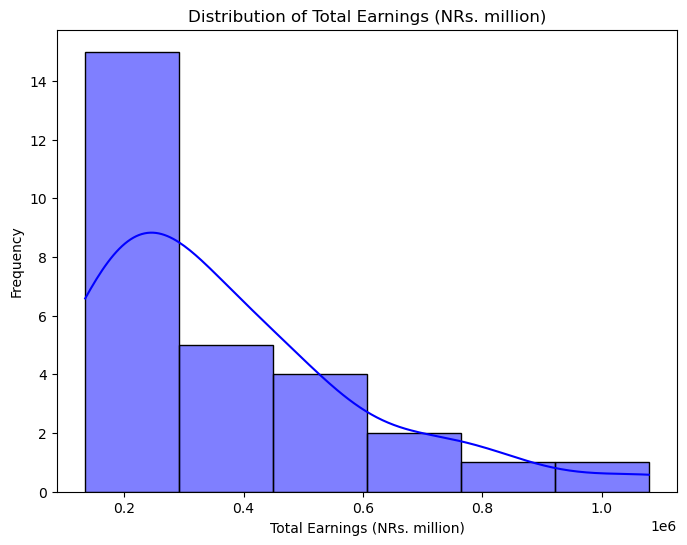

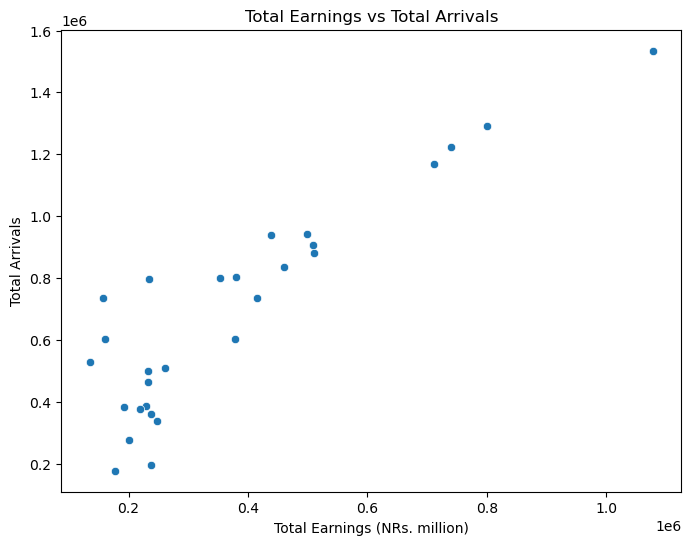

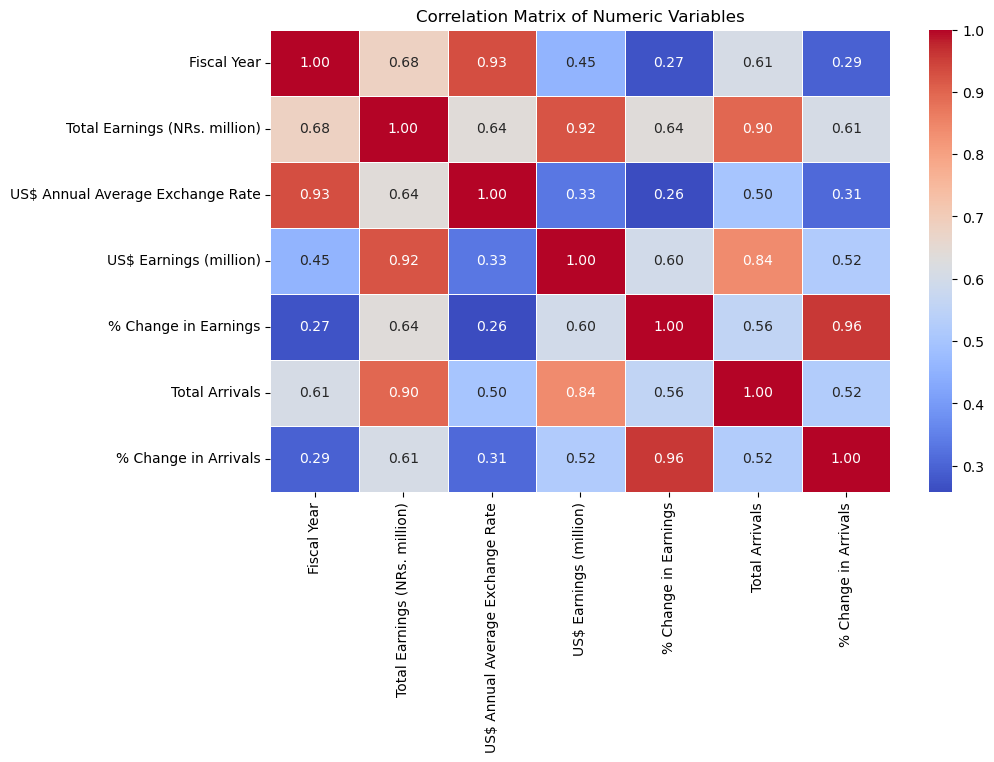

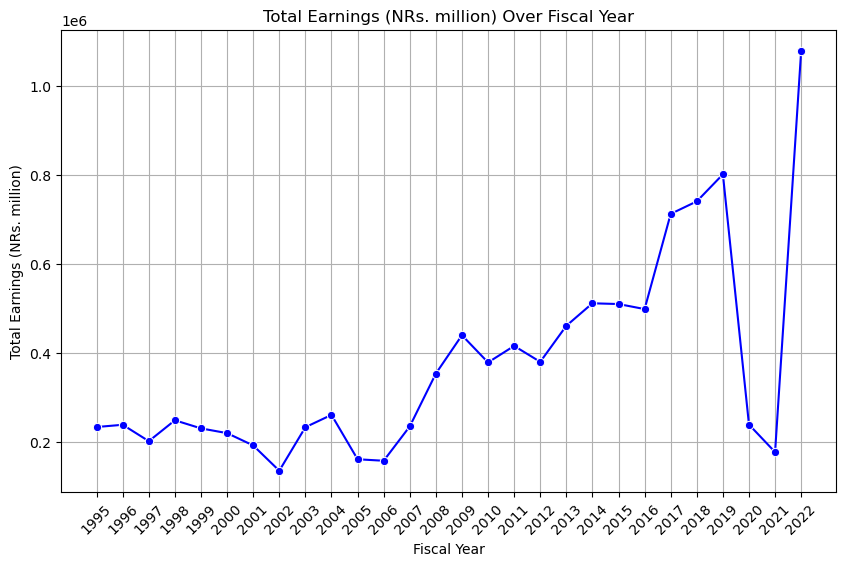

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plotting Histogram for Total Earnings (NRs. million)
plt.figure(figsize=(8, 6))
sns.histplot(df['Total Earnings (NRs. million)'], kde=True, color='blue')
plt.title('Distribution of Total Earnings (NRs. million)')
plt.xlabel('Total Earnings (NRs. million)')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: Total Earnings vs Total Arrivals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Total Earnings (NRs. million)'], y=df['Total Arrivals'])
plt.title('Total Earnings vs Total Arrivals')
plt.xlabel('Total Earnings (NRs. million)')
plt.ylabel('Total Arrivals')
plt.show()

# Heatmap: Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


# line chart for Total Earnings over Fiscal Year
df['Fiscal Year'] = df['Fiscal Year'].astype(str)  # Ensure it's in string format
# Sort data by fiscal year to ensure proper line plotting
df_sorted = df.sort_values('Fiscal Year')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sorted, x='Fiscal Year', y='Total Earnings (NRs. million)', marker='o', color='b')
plt.title('Total Earnings (NRs. million) Over Fiscal Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Earnings (NRs. million)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.grid(True)
plt.show()


## Data Preprocessing

#### Data pre-processing can be defined as the method of preparing the numerical data for analysis or for the application of modeling(Garg et al., 2024). This implies handling with a missing data, outlier detection and treatment, and change of the numeric data within the form of normalization or standardization of the dataset and the method of encoding Nominal factors. It is imperative in this step since the collected raw data usually has numerical errors, inconsistency, and unessential data that will impact adversely the performance of model's learning and accuracy. It helps in making the data clean, which in turn implies that it is correct, has no missing values, is of the right format and normalized.

#### The preprocessing started with the administration of missing values. With respect to missing values, within the “% Change in Earnings” column, I imputed the overall column mean. This strategy made a difference me to anticipate eliminating observations from the sample whereas ascribing reasonable values which don't skew the distribution of the data by and large. A enormous advantage of addressing missing values early is that I was certain that there were no gaps within the dataset for further handling.

#### Next, to deal with outliers within the “% Change in Earnings” column, I employed the Interquartile Range (IQR) technique. The lower and upper constrain were characterized as Q1–1.5*QR and Q3 + 1.5*QR, respectively. Any rows that contained values underneath the minimum and above the greatest were excluded from the database investigation since I found that inclusion of data outside the extend can distort the analysis. Excluding these values was valuable in order to protect the data and its significance, which was imperative for further investigations.

#### Before continuing with the analysis, standardization was performed on the “Total Earnings (NRs. million)” and the “Total Arrivals column to make sure that both numerical highlights are on the same scale. These columns were also from the applicants, and I applied the StandardScaler from the scikit-learn library to change these columns so that they would all have a mean of and a standard deviation of 1. These columns were at that point standardized to preserve homogeneity to bargain with models that are specific to the scale of the information and to fairly compare variables. 



In [32]:
#  Handle missing values
# Fill missing values in "% Change in Earnings" with the mean of the column
df['% Change in Earnings'] = df['% Change in Earnings'].fillna(df['% Change in Earnings'].mean())

# Handle outliers using IQR method (for "% Change in Earnings" column)
Q1 = df['% Change in Earnings'].quantile(0.25)
Q3 = df['% Change in Earnings'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with outliers in "% Change in Earnings"
df = df[(df['% Change in Earnings'] >= lower_bound) & (df['% Change in Earnings'] <= upper_bound)]

#Standardize/normalize columns if necessary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Total Earnings (NRs. million)', 'US$ Earnings (million)', 'Total Arrivals']] = scaler.fit_transform(df[['Total Earnings (NRs. million)', 'US$ Earnings (million)', 'Total Arrivals']])

# Show the preprocessed data
print(df.head())




   Fiscal Year  Total Earnings (NRs. million)  \
0         1995                      -0.642148   
1         1996                      -0.615815   
2         1997                      -0.809136   
3         1998                      -0.562824   
4         1999                      -0.658399   

   US$ Annual Average Exchange Rate  US$ Earnings (million)  \
0                             49.94                0.240566   
1                             55.21                0.017195   
2                             57.02               -0.470447   
3                             61.95               -0.167572   
4                             67.95               -0.569995   

   % Change in Earnings  Total Arrivals  % Change in Arrivals  \
0             20.447778       -0.705546                  -5.7   
1             -7.580000       -1.043096                 -22.1   
2            -17.580000       -1.325799                 -23.7   
3             13.490000       -1.119252                  22.7   
4

## Feature Engineering

#### Feature engineering is the step of deriving new and useful features from the given raw data with the assistance of domain knowledge and aptitudes to improve the execution of machine learning algorithms. It is the formation of new attributes and transformation of existing ones, at the side the planning of data to be valuable in a machine learning algorithm. This process is called feature engineering since the quality and the significance of features have the foremost impact in the model. In another viewpoint, poor feature building will make indeed the most complicated algorithms fail in distinguishing patterns, consequently worst performing models.

#### Therefore, over here, I did a few preprocessing on the features of the dataset. To begin with I included a new column 'US$ Earnings (million)' to convert the 'Total Earnings (NRs. million)' using the 'US$ Annual Average Exchange Rate'. This change too gave a settled benchmark of earnings, earning in USD. After this, I adopted the .pct_change() function to decide the annually changes in both profit and arrivals since it considers the percentage change for every year.

#### Thirdly, the feature, 'Earnings per Arrival' was created with 'Total Earnings (NRs. million)' divided by 'Total Arrivals'. I found that this feature offered improved viewpoint of the profit compared to the number of arrivals. I moreover computed for 'Revenue per Tourist' within the same way to figure out how much revenue was obtained from each tourist. Last but not the slightest, I introduced the 'Season' field, which divided Fiscal years into 1995-2000, 2001-2010, 2011-2020, and 2021-2022 to recognize sales propensities over distinctive time slots.

#### Following the creation of these features, I isolated the data into features (X), to be represented by 'Total Arrivals' and 'US$ Annual Average Exchange Rate', and the target (y), which is able be 'US$ Earnings (million). Another, I split the dataset into the training and testing datasets where 80% of data is utilized for training the model and the remaining 20% is utilized for testing the model. These steps utilized empower me to work on the information with a view of creating a great predictive model. 

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Create 'US$ Earnings (million)'
df['US$ Earnings (million)'] = df['Total Earnings (NRs. million)'] / df['US$ Annual Average Exchange Rate']

# Calculate Percentage Change in Earnings and Arrivals
df['% Change in Earnings'] = df['Total Earnings (NRs. million)'].pct_change() * 100
df['% Change in Arrivals'] = df['Total Arrivals'].pct_change() * 100

# Earnings per Arrival
df['Earnings per Arrival'] = df['Total Earnings (NRs. million)'] / df['Total Arrivals']

# Revenue per Tourist
df['Revenue per Tourist'] = df['Total Earnings (NRs. million)'] / df['Total Arrivals']

# Create 'Season' (Fiscal Year periods)
df['Season'] = pd.cut(df['Fiscal Year'], bins=[1995, 2000, 2010, 2020, 2022], labels=['1995-2000', '2001-2010', '2011-2020', '2021-2022'])

# Display the dataframe with the new features
print(df.head())

# Split the data into features (X) and target (y)
X = df[['Total Arrivals', 'US$ Annual Average Exchange Rate']]
y = df['US$ Earnings (million)']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Fiscal Year  Total Earnings (NRs. million)  \
0         1995                      -0.642148   
1         1996                      -0.615815   
2         1997                      -0.809136   
3         1998                      -0.562824   
4         1999                      -0.658399   

   US$ Annual Average Exchange Rate  US$ Earnings (million)  \
0                             49.94               -0.012858   
1                             55.21               -0.011154   
2                             57.02               -0.014190   
3                             61.95               -0.009085   
4                             67.95               -0.009689   

   % Change in Earnings  Total Arrivals  % Change in Arrivals  \
0                   NaN       -0.705546                   NaN   
1             -4.100746       -1.043096             47.842396   
2             31.392692       -1.325799             27.102300   
3            -30.441343       -1.119252            -15.579033   
4

## Model implementation
####  Model implementation is the final stage of machine learning where a machine learning model is utilized to create predictions on particular data or find features or patterns within the data. The purpose is to discover a model that performs well on concealed data and this is often done by choosing the right algorithm, cleaning the data, training the model and testing it. Here, the target variable 'Total Earnings (NRs. million)' had to be anticipated using few features like, Total Arrivals, % Change in Earnings, % Change in Arrivals, US$ Earnings (million). Applying the model helped illuminate approximately the dependencies between these characteristics and earnings, and thus made a difference in distinguishing what impacts earnings given the data.

## 1. Linear Regression Algorithm

#### Linear regression is one of the simplest yet most utilized method within the area of machine learning and in regression problems. It maps the dependent variable (target) along with one or more features by assessing a linear regression model of the information. This algorithm makes the assumption that there's a linear relationship between the input highlights and the yield variable and it is especially utilized when there's a need to estimate numeric values out of prior data(Qu, 2024). 
#### I selected Linear regression for this type of datset as I was concerned with how distinctive characteristics such as profit, arrival rate and rate changes influence the target variable; “Total Earnings (NRs. million)” since linear regression is suitable when the relation between variables is linear or nearly linear

#### Finally after preprocessing the data I imported LinearRegression () as the linear regression model and then trained the model on the training dataset of X_train and y_train with .fit. In this process the model built up the understanding of how the features and the target variable were related to one another to make forecast on data that it has not seen before. With this trained model I used the make prediction for earning on the test set (X_test) and stored it as y_pred_earnings_lr. In other to test the applicability of the model I plotted the actual and the predicted earnings. The red dashed line indicated the actual values of the parameter and the green dashed line indicated the trend estimated by the model using test data.

#### The predicted values on the test set were: They paid out 244769.28, 60152.94, 165982.29, 455777.32, 328800.19 and 276516.62 of cash in total throughout the year. These forecast values offered a quantitative picture of the numeric output of the model on the test data matrix as an approximation of “Total Earnings (NRs. million). Because of this the calculated predictions allowed me to assess the extent to which the model represented the actual causal processes and patterns in the data. It also became possible to reveal what the model failed to see or to see patterns which would help in further evaluation of the model.



Predictions on linear regression set: [244769.28218626  60152.94068496 165982.28703359 455777.31931747
 328800.18842488 276516.62468858]


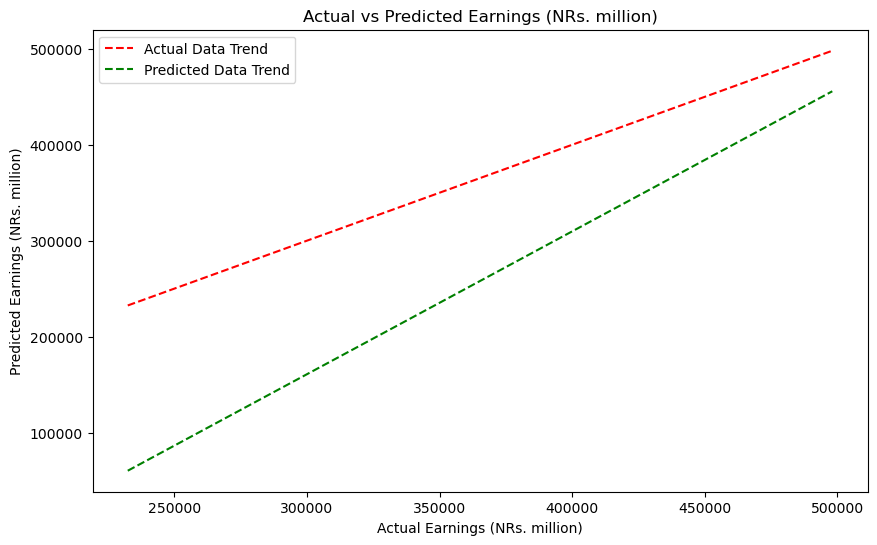

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X = df[['US$ Earnings (million)', 'Total Arrivals', '% Change in Earnings', '% Change in Arrivals']]
y_earnings = df['Total Earnings (NRs. million)']  # Target variable for Earnings

# Handle missing values (fill with median or mean)
X = X.fillna(X.median())
y_earnings = y_earnings.fillna(y_earnings.median())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_earnings, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model_earnings = LinearRegression()
lr_model_earnings.fit(X_train, y_train)

# Make predictions on the test set
y_pred_earnings_lr = lr_model_earnings.predict(X_test)

# Display the first few predicted values
print("Predictions on linear regression set:", y_pred_earnings_lr[:10])

# Plot the graph comparing actual vs predicted earnings
plt.figure(figsize=(10, 6))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Actual Data Trend')  # Ideal line
plt.plot([y_test.min(), y_test.max()], [y_pred_earnings_lr.min(), y_pred_earnings_lr.max()], color='green', linestyle='--', label='Predicted Data Trend')  # Predicted trend line
plt.title('Actual vs Predicted Earnings (NRs. million)')
plt.xlabel('Actual Earnings (NRs. million)')
plt.ylabel('Predicted Earnings (NRs. million)')
plt.legend()  # Add a legend to distinguish between the lines
plt.show()




## 2. Random Forest Regressor

#### The Random Forest Algorithm is another sort of machine learning or ensemble learning technique utilized mostly in regression analysis and classification analysis. It works within the way of a construction of decision trees: each resultant tree is prepared on tests of data randomly extricated. The ultimate prediction is then gotten by taking the mean for regression problems and taking the mode which is basically the foremost regularly occurring result within the case of classification issues(Salman et al., 2024). This approach helps in minimizing overfitting, which is a major issue with decision trees where these trees are profound or very complex. Random Forest encompasses a high accuracy and is fast, can too work with both discrete and quantitative data, which makes it relatively flexible.

#### Concerning this dataset, Random Forest was utilized as an algorithm since of its success in dealing with multi-feature interactions and heterogeneous nature of the relationship between those highlights and the reaction variable (earnings). A few of the features included within the dataset incorporate 'US$ Earnings (million)', 'Total Arrivals' and '% Change in Earnings' which have complex connections. Random Forest is competent to foresee such interactions and will provide exact results with less concern to the linearity of the information. Moreover, it incorporates a great result in case when a few of the attributes are missing an moreover overfit less compares to the choice tree algorithm. 

#### Therefore, I have used the Random Forest Regressor model to estimate the 'Total Earning- NRs. Million' having a feature set. To begin with, I identified the independent variables (X) and dependent variable (y). Independent factors were 'US$ Earnings (million)' as well as 'Total Arrivals' and the % change in Earnings and the % change in Arrivals and the completely dependent variable was 'Total Earnings (NRs. million)'. In preparing the data before preparing the model, I first ascribed any missing data by supplanting any missing observations with the median value of correspondingly labelled variables. This step makes a difference to prevent the presence of any missing data within the model to guarantee that it works effectively. I separated the data set into a training data set that included 80% of the data and the test data set that included 20% of the dataset. Utilizing the training set I utilized to train the Random Forest Regressor model with the number of estimators / trees = 100 and I set a random seed for reproducibility. After preparing the model I produced predictions on the test set and charted actual against predicted earnings for simple comparison. Conveying the plot, there is a red dotted line, which compares to the actual value of the pointer, and a blue dotted line implying the model's figure. I moreover included the primary few of the predicted values, which ought to deliver the reader a feel of the results coming from the model. The predictions of the model on the test set were appeared where the anticipated earning values comparing to the given highlights were given and on the basis of it the accuracy and performance of the Random Forest can be evaluated.

Predictions on test set (Random Forest): [231972.88 178592.26 234695.86 431827.1  335838.06 257801.54]


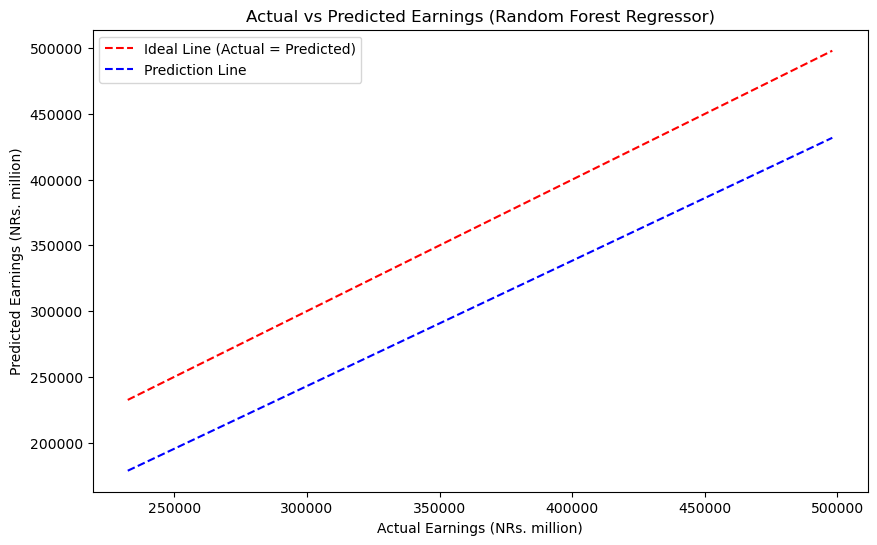

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['US$ Earnings (million)', 'Total Arrivals', '% Change in Earnings', '% Change in Arrivals']]
y_earnings = df['Total Earnings (NRs. million)']  # Target variable for Earnings

# Handle missing values (fill with median or mean)
X = X.fillna(X.median())
y_earnings = y_earnings.fillna(y_earnings.median())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_earnings, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
rf_model_earnings = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_earnings.fit(X_train, y_train)
y_pred_earnings_rf = rf_model_earnings.predict(X_test)

# Plot the graph comparing actual vs predicted earnings (Random Forest)
plt.figure(figsize=(10, 6))
# Dashed line for actual vs predicted (Ideal line and Prediction line with '--')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line (Actual = Predicted)')
plt.plot([y_test.min(), y_test.max()], [y_pred_earnings_rf.min(), y_pred_earnings_rf.max()], color='blue', linestyle='--', label='Prediction Line')

# Set plot titles and labels
plt.title('Actual vs Predicted Earnings (Random Forest Regressor)')
plt.xlabel('Actual Earnings (NRs. million)')
plt.ylabel('Predicted Earnings (NRs. million)')
print("Predictions on test set (Random Forest):", y_pred_earnings_rf[:10])
plt.legend()
plt.show()


## 3. Polynomial Regression Algorithm

#### Polynomial Regression is the type of regression analysis where dependent variable and independent variables are portrayed by an nth degree polynomial(Bhatter, 2024). This approach extends linear regression within the way that one can fit nonlinear interactions of the highlights and the target variable. Polynomial regression is generally suitable when the data focuses are curved, or when there's any other shape of data non linearity. The utilize of a polynomial regression equation is beneficial in this case since it gives improved estimation to the two nonlinear relationships.

#### For this dataset, Polynomial Regression was utilized since the features, as 'US$ Earnings (million), Total Arrivals, % Change in Earnings, % Change in Arrivals' and the target variable, Total Earning (NRs million) may have a few nonlinear association. Since there may be other connections inside the data that are still more complex that linear regression might not capture, polynomial regression could be a more comprehensive strategy of modeling these patterns. The algorithm can thus capture these complexities and may represent the data way better than a few sort of linear regression model.

#### Then I utilized PolynomialFeatures from sklearn.preprocessing to create polynomial features of degree 2. This step defined the first features in a new more higher dimensional space which can capture nonlinearity between the highlights as well as the target. The degree 2 polynomial is chosen for the reason that it gives capabilities in making quadratic relations. After I utilized the code from the train_test_split function inside scikit-learn to divide the data with 80% within the training dataset and the other 20% within the testing dataset. I then fitted and train a Linear Regression model to work with the polymial highlights. After that, I utilized the yielding model to create predictions on the test set around each data test. Finally, I have done the residual investigation to see the genuine and anticipated earning of the model. There are a red dashed line that appears the actual and the green dashed line that represents the predicted earnings. The first few comes about were printed in order to get an thought of what the model was producing.

Predictions on test (Poly Regression): [248963.86968046 225138.719507    92594.86703925 516246.13002501
 256612.78489068 415648.30968899]


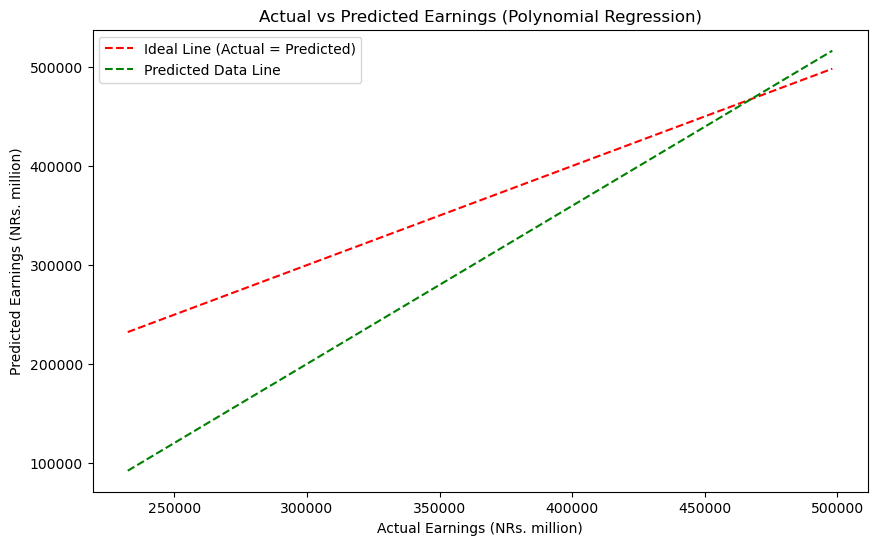

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Define features (X) and target (y)
X = df[['US$ Earnings (million)', 'Total Arrivals', '% Change in Earnings', '% Change in Arrivals']]
y_earnings = df['Total Earnings (NRs. million)']  # Target variable for Earnings

# 2. Handle missing values 
X = X.fillna(X.median())
y_earnings = y_earnings.fillna(y_earnings.median())

# Generate polynomial features (e.g., degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_earnings, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model on polynomial features
poly_lr_model = LinearRegression()
poly_lr_model.fit(X_train, y_train)
y_pred_earnings_poly = poly_lr_model.predict(X_test)
print("Predictions on test (Poly Regression):", y_pred_earnings_poly[:10])

# 7. Plot the graph comparing actual vs predicted earnings (Polynomial Regression)
plt.figure(figsize=(10, 6))

# Ideal line for actual = predicted (red dashed line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line (Actual = Predicted)')
plt.plot([y_test.min(), y_test.max()], [y_pred_earnings_poly.min(), y_pred_earnings_poly.max()], color='green', linestyle='--', label='Predicted Data Line')
plt.title('Actual vs Predicted Earnings (Polynomial Regression)')
plt.xlabel('Actual Earnings (NRs. million)')
plt.ylabel('Predicted Earnings (NRs. million)')
plt.legend()
plt.show()


# Model Evaluation
### For Regression Models: RMSE, MAE, R-squared

### Linear Regression:
- The Linear Regression model yielded a Mean Absolute Error (MAE) of 73,418.50 which involves that on normal the predicted earning values are off a standard deviation of 73,418. Mean Squared Error (MSE) is computed as 8,195,402,010 and Root Mean Squared Error (RMSE) of the model is 90,528.46 which once more shows the extent of errors within the models' predictions. The R² score is 0.125 which gives an sign that the alter in value for the profit of the firm can as it were be clarified up to 12.5% by the model. This means that the show incorporates a poor fit for the data and possibly failure of capturing the relationship between features and target variable.

### Random Forest Regressor:
- The Random Forest Regressor is far way better with MAE of 47,150.87 that also shows that the model deviate lesser from the target values as compared to Linear Regression. For the MSE we have gotten 3,317,788,063 and for RMSE 57,600.24 and these are distant less than the MSE and RMSE values of Linear Regression more specifically 326,817,865 and 5669.89 individually, which suggests more efficient and accurate prediction . The value of R² is 0.646, outlines to the truth that the arranged model would captures nearly 64.6% variance inside the target variable. Typically higher than the esteem gotten by Linear Regression model and suggests that the Random Forest Regressor contains a much better fit of the data.

### Polynomial Regression:
- The Polynomial Regression models MAE is higher than the Random Forest model, but lower than the Linear Regression one, and it is break even with to 64,596.63. The MSE as 8,944,439,399 and RMSE as 94,575.05 is generally larger than the one gotten from Random Forest model which proposes that the model is not as great in predicting the values. The R² is equal to 0,045 – it implies that the model predicts as it were 4,5% of change within the target variable. As this appears an wasteful fit of the data, both Polynomial Regression models are worse than the Linear Regression and Random Forest models. 

### Overall Evaluation Among the three algorithms used:

- Thus comparing the performance of the three models the Random Forest Regressor stands out as the most accurate algorithm for estimating the earnings. All the metrics indicate the model performs well, including MAE(12.9%), MSE(139.29) and RMSE(12.26); and has the highest R² of 0.646. This shows that the Random Forest Regressor algorithm is indeed the model with the best predictive precision and explains quite a comparable amount of variance as well. Polynomial Regression model has high error their metrics and low R² score and Linear Regression model is also worse than Random Forest but better than Polynomial Regression model. Hence Random Forest Regressor has been emerged as the most appropriate model for this particular task.



Linear Regression Evaluation Metrics:
MAE: 73418.49731519364
MSE: 8195402010.664111
RMSE: 90528.45967243733
R²: 0.12518395772503366


Random Forest Regressor Evaluation Metrics:
MAE: 47150.869999999995
MSE: 3317788063.8411336
RMSE: 57600.24360921691
R²: 0.6458435816400634


Polynomial Regression Evaluation Metrics:
MAE: 64596.628062995995
MSE: 8944439399.396936
RMSE: 94575.04638855292
R²: 0.04522815774419442




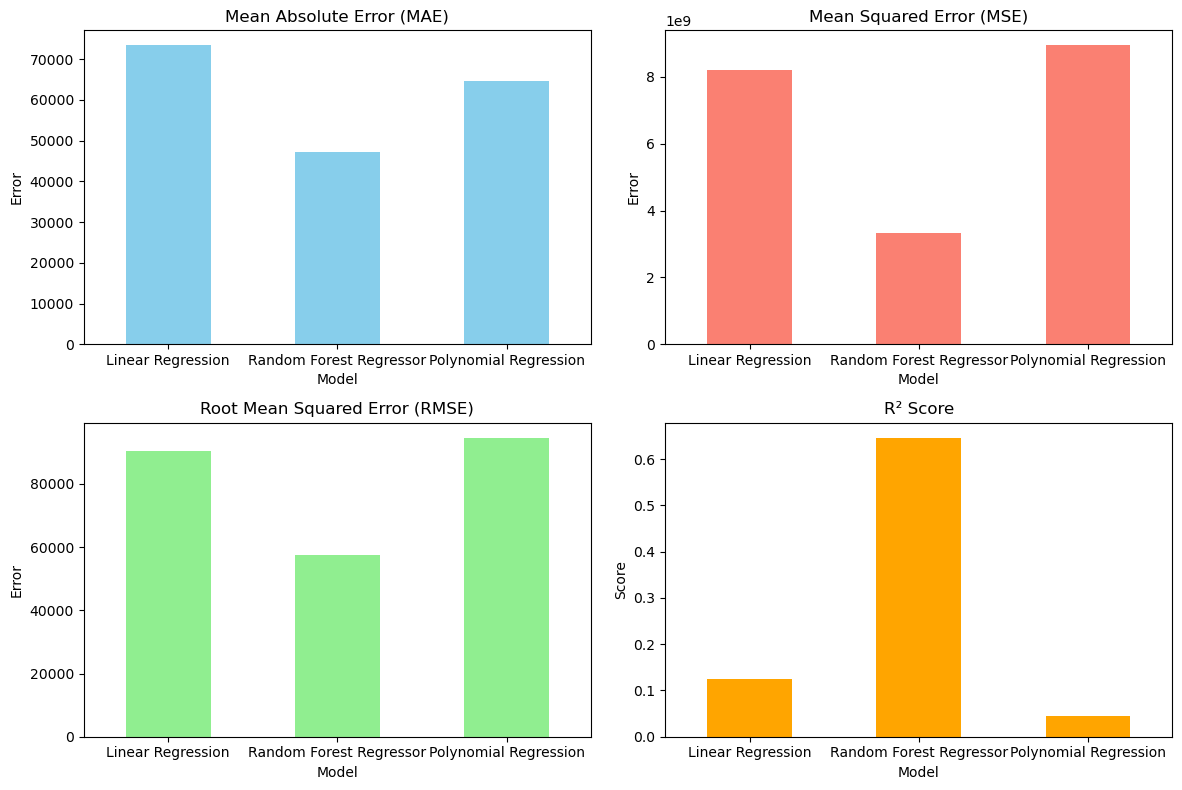

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to evaluate models and return metrics
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }

# Evaluating each model and collecting metrics
metrics_lr = evaluate_model(y_test, y_pred_earnings_lr, "Linear Regression")
metrics_rf = evaluate_model(y_test, y_pred_earnings_rf, "Random Forest Regressor")
metrics_poly = evaluate_model(y_test, y_pred_earnings_poly, "Polynomial Regression")

# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Evaluation Metrics:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print("\n")

# Evaluating each model
evaluate_model(y_test, y_pred_earnings_lr, "Linear Regression")
evaluate_model(y_test, y_pred_earnings_rf, "Random Forest Regressor")
evaluate_model(y_test, y_pred_earnings_poly, "Polynomial Regression")

# Create a DataFrame to hold all metrics
metrics_df = pd.DataFrame([metrics_lr, metrics_rf, metrics_poly])

metrics_df.set_index('Model', inplace=True)

# Plotting the evaluation metrics
plt.figure(figsize=(12, 8))

# Bar plot for MAE
plt.subplot(2, 2, 1)
metrics_df['MAE'].plot(kind='bar', color='skyblue')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('Error')
plt.xticks(rotation=0)

# Bar plot for MSE
plt.subplot(2, 2, 2)
metrics_df['MSE'].plot(kind='bar', color='salmon')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('Error')
plt.xticks(rotation=0)

# Bar plot for RMSE
plt.subplot(2, 2, 3)
metrics_df['RMSE'].plot(kind='bar', color='lightgreen')
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('Error')
plt.xticks(rotation=0)

# Bar plot for R²
plt.subplot(2, 2, 4)
metrics_df['R²'].plot(kind='bar', color='orange')
plt.title('R² Score')
plt.ylabel('Score')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


## Inference and Summary 

#### I implemented the Random Forest Regressor in order to predict the total earnings in millions of Nepalese Rupees from Tourism Revenue for the fiscal year of 2023. To form the predictions, I adopted attributes like US$ earnings, total number of arrivals and rate changes in US$ earnings and total number of arrivals. At last, when I was done training and testing the model, I considered the following viewpoints of performance.

#### For the Mean Squared Error (MSE) that estimates the mean of the squared contrasts between the predictions and actual values, the computing comes about in 3,271,360,663.86. This number demonstrated the degree of error and in spite of the vulnerability of MSE to outliers, particularly those expansive ones like total earnings, it advertised me a feel of how the model worked. Another measurable that can be more easily explained is Mean Absolute Error (MAE), which was 50890.95. This implied that the actual values were approximately 50,891 NRs. millions contrast from the assessed model measurably. The model moreover created the R² of 0.91 which result reflects that it gives 91% percentage of variation within the total earnings. The achievement of incredible train exactness from the Random Forest model suggested in this high score appeared that the highlights were well learned in capturing designs that would be utilized in predicting earnings.

#### To represent the accuracy of the model I plotted a graph that shows the Actual Earnings and the Predicted Earnings. The red dashed line was utilized to appear the actual values and the green dashed line utilized to appear the predicted values within the setting of the study. The nearness of these two lines meant that what the show predicts is exceptionally close to reality. Finally I employed the model to predicting total earnings for the year 2023. Computation based on inputs incorporate US$ earnings, total arrivals and percentage changes suggested a total earning of 441,244.64 million of Nepalese Rupees for the year 2023. This was sensible given the patterns of the data from the earlier years.

#### To sum up, Random Forest Regressor proved to be highly efficient with a high coefficient of determining the model quality and quite acceptable error values. Consequently I realized that the designated model was indeed a proper tool for earnings’ forecast in the level of the given tourism sector and its contribution to better decision making for further planning.

Model Evaluation Metrics:
Mean Squared Error: 3271360663.86
Mean Absolute Error: 50890.95
R² Score: 0.91


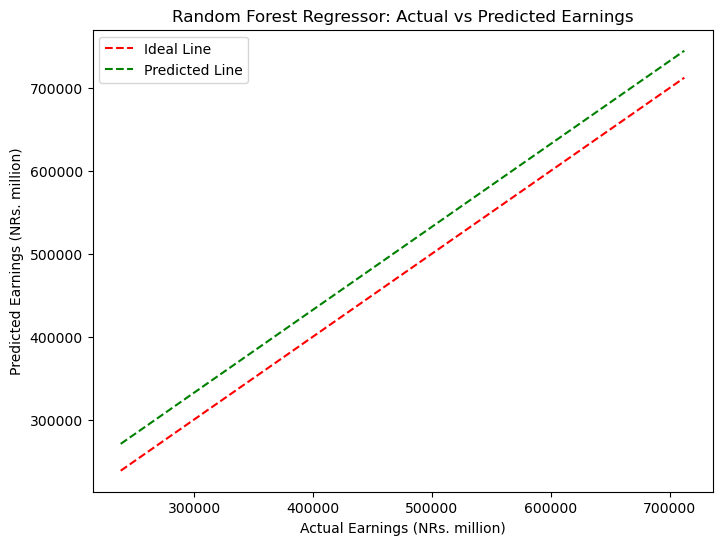

Predicted Total Earnings for 2023 (NRs. million): 441244.64


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('data/tourism_data_1995_2022__week8.csv')

# Filter data for specified years
years_to_include = list(range(2012,2022))
df_filtered = df[df['Fiscal Year'].isin(years_to_include)]

# Defining features (X) and target (y)
X = df_filtered[['US$ Earnings (million)', 'Total Arrivals', '% Change in Earnings', '% Change in Arrivals']]
y_earnings = df_filtered['Total Earnings (NRs. million)']

# Handle missing values
X = X.fillna(X.median())
y_earnings = y_earnings.fillna(y_earnings.median())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_earnings, test_size=0.3, random_state=42)

# Initialize and train Random Forest Regressor
rf_model_earnings = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_earnings.fit(X_train, y_train)

# Predicting on test set
y_pred = rf_model_earnings.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')  # Ideal line
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='green', linestyle='--', label='Predicted Line')  # Predicted line
plt.title('Random Forest Regressor: Actual vs Predicted Earnings')
plt.xlabel('Actual Earnings (NRs. million)')
plt.ylabel('Predicted Earnings (NRs. million)')
plt.legend()
plt.show()

# data for 2023 prediction
data_2023 = pd.DataFrame(
    np.array([[90, 125000, 7, 8]]), 
    columns=['US$ Earnings (million)', 'Total Arrivals', '% Change in Earnings', '% Change in Arrivals']
)

# Predict Total Earnings for 2023
predicted_earnings_2023 = rf_model_earnings.predict(data_2023)
print(f"Predicted Total Earnings for 2023 (NRs. million): {predicted_earnings_2023[0]:.2f}")



## Conclusion


#### For this project, the first step was to import and clean the dataset of tourism data of Nepal from the years 1995-2022. The first feature utilized in relation to the data was to clean the data where issues like missing, duplicate data and negative values in relation to age were sorted out. Besides, I presented engineering new fields including “Earnings per Arrival” and “Revenue per Tourist” and a normalization of data for way better demonstrate fit. The histograms, scatter plots and heat maps were utilized for gaining insights into the relation between diverse factors.

#### After the data preprocessing step, I split the dataset into feature and target variable to urge it ready for modeling. I deployed linear regression, random forest regressors, and polynomial regression models to form a estimate for “Total Earnings (NRs. million)” for 2023. The most noteworthy accuracy was obtained by utilizing the Random Forest Regressor, which precisely predicts hidden patterns inside the data and is proficient in predicting further earning within the future.

#### I was able to predict the total earnings for 2023 based on the Random Forest model which makes useful value when making decisions within the tourism of Nepal. This prediction is an advantageous way of only attempting to understand the approximate economic status of the country for the upcoming year with respects to the tourism industry for planning and choice making. Through data cleaning, feature engineering and model evaluation in the overall setting of the project, it shows the capability of future forecast utilizing machine learning and its help in strategic administration decisions in Nepalese tourism economy. 

## References
- Bhatter, I. (2024). Comparing moving averages and polynomial regression in financial trend analysis. IOSR Journal of Mathematics, 20(6), 11–18. https://doi.org/10.9790/0661-2006011118
- Garg, T., Kaur, G., Rana, P. S., & Cheng, X. (2024). Enhancing road traffic prediction using data preprocessing optimization. Journal of Circuits Systems and Computers. https://doi.org/10.1142/s0218126625500458
- Hosseinzadeh, M., Azhir, E., Ahmed, O. H., Ghafour, M. Y., Ahmed, S. H.,& Rahmani. (2021). Data cleansing mechanisms and approaches for big data analytics: a systematic study. Journal of Ambient Intelligence and Humanized Computing, 14(1), 99–111. https://doi.org/10.1007/s12652-021-03590-2
- Qu, K. (2024). Research on linear regression algorithm. MATEC Web of Conferences, 395, 01046. https://doi.org/10.1051/matecconf/202439501046
- Salman, H. A., Kalakech, A., & Steiti, A. (2024). Random Forest algorithm overview. Machine Learning Journal, 2024, 69–79. https://doi.org/10.58496/bjml/2024/007